In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [3]:
df_clustered01 = pd.read_csv('all_categories_clustered.csv')

In [6]:
numeric_columns = df_clustered01.select_dtypes(include=[float, int]).columns

In [7]:
cluster_profiles = df_clustered01.groupby('Pred')[numeric_columns].agg(['mean', 'median', 'std']).reset_index()
print(cluster_profiles)

  Pred    Calories                    Fat Calories                     \
              mean median         std         mean median         std   
0  0.0  460.000000  370.0  302.702117   138.666667    0.0  225.922448   
1  1.0  299.565217  320.0  241.029577   157.391304  170.0  131.320821   
2  2.0  364.400000  290.0  193.133805   162.000000  120.0  157.294840   
3  3.0  406.153846  210.0  452.797572   217.692308  150.0  255.380561   
4  4.0  396.666667  260.0  314.006369   199.444444  110.0  190.958838   
5  5.0  192.666667  200.0  156.089108    92.000000   90.0   72.722565   
6  6.0  552.500000  500.0  325.328505   190.833333  125.0  231.141764   
7  7.0  496.153846  490.0  229.947040   153.076923   80.0  174.087364   
8  8.0  370.833333  240.0  301.799749   124.722222    0.0  220.590599   
9  9.0  304.545455  160.0  218.557253   132.727273  140.0  144.228354   

     Fat (g)                    ... Dietary Fiber (g) Sugars (g)         \
        mean median        std  ...             

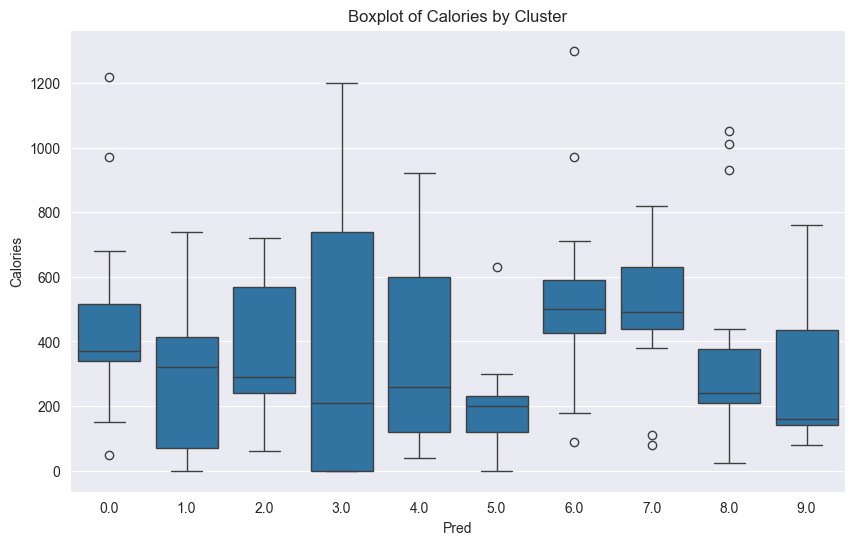

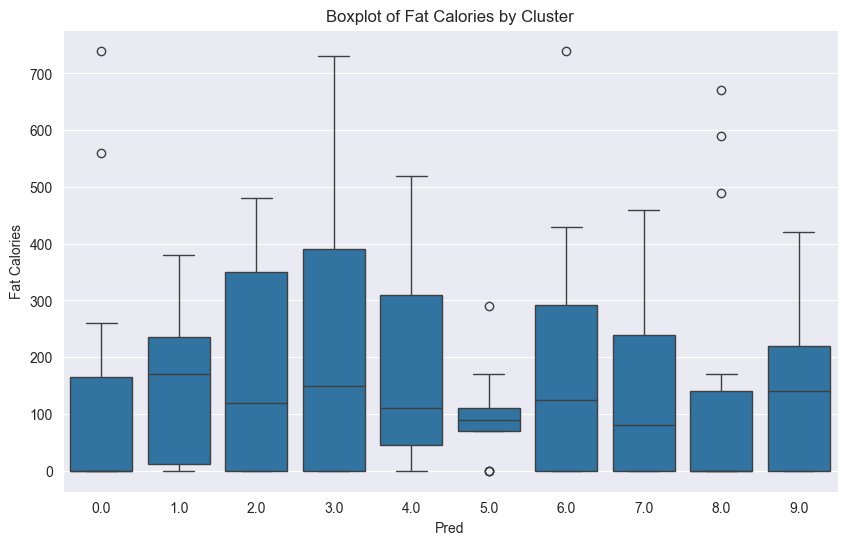

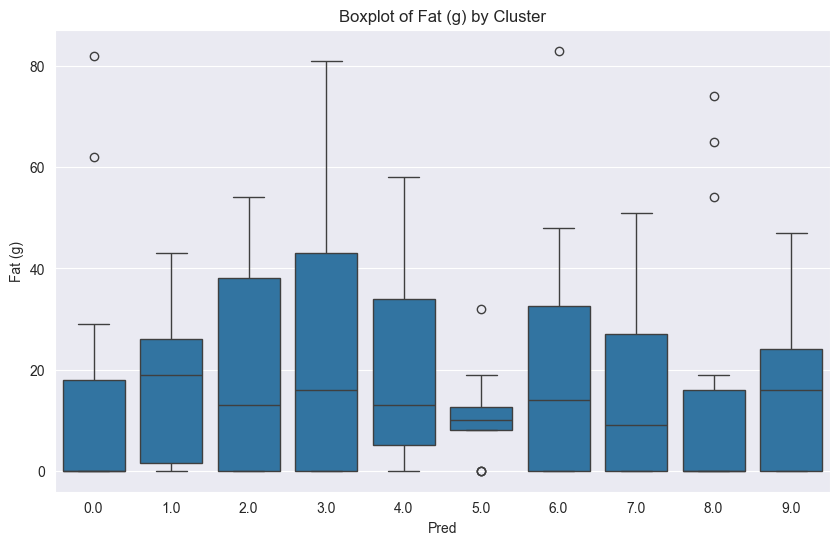

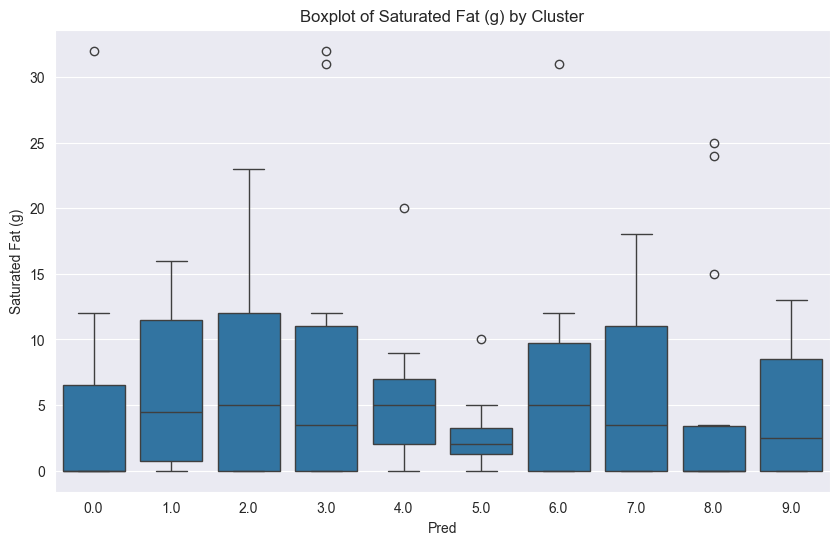

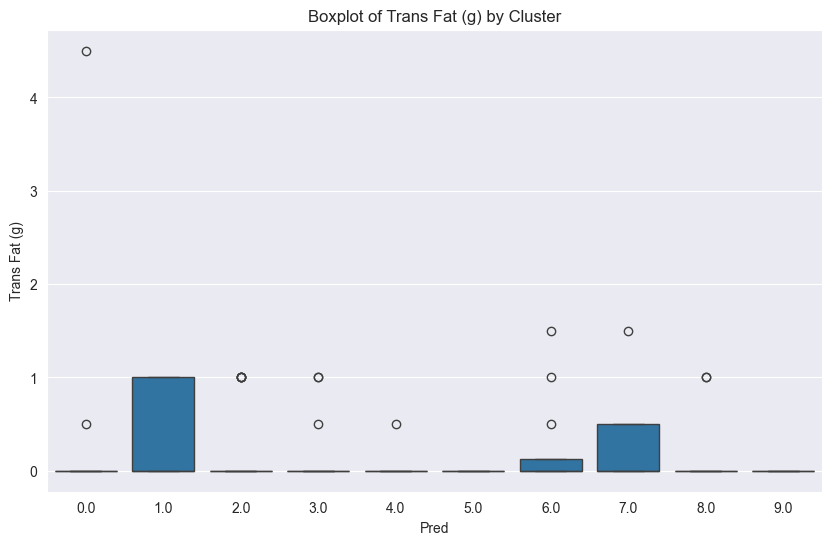

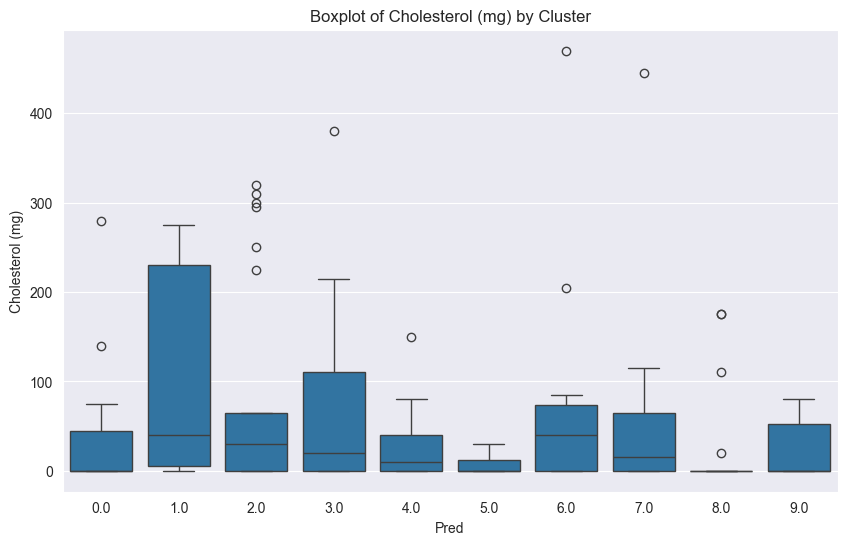

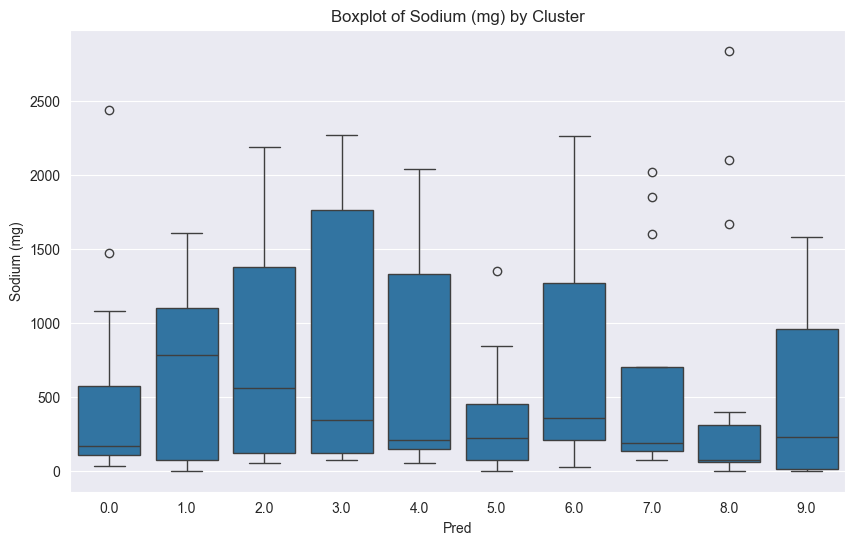

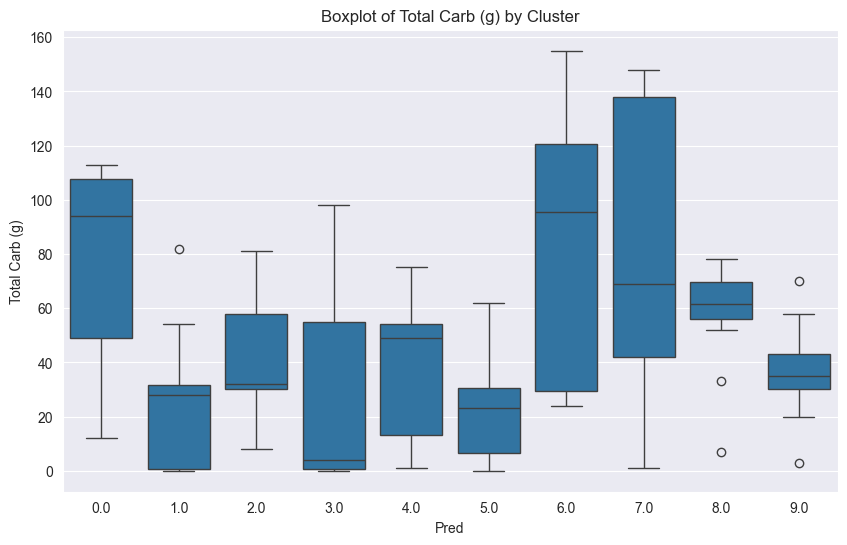

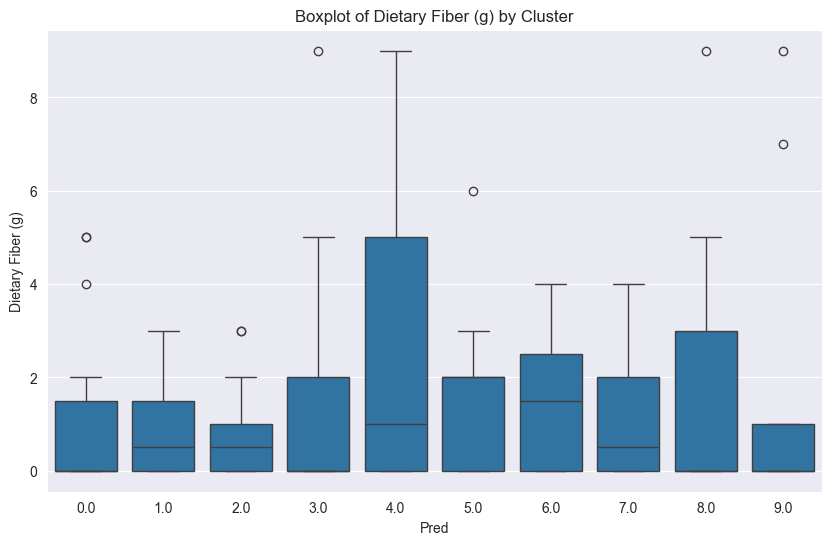

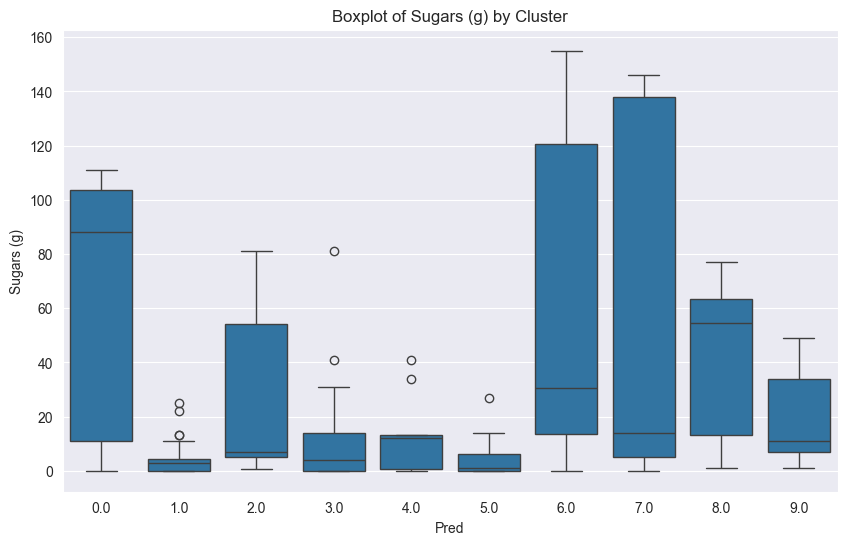

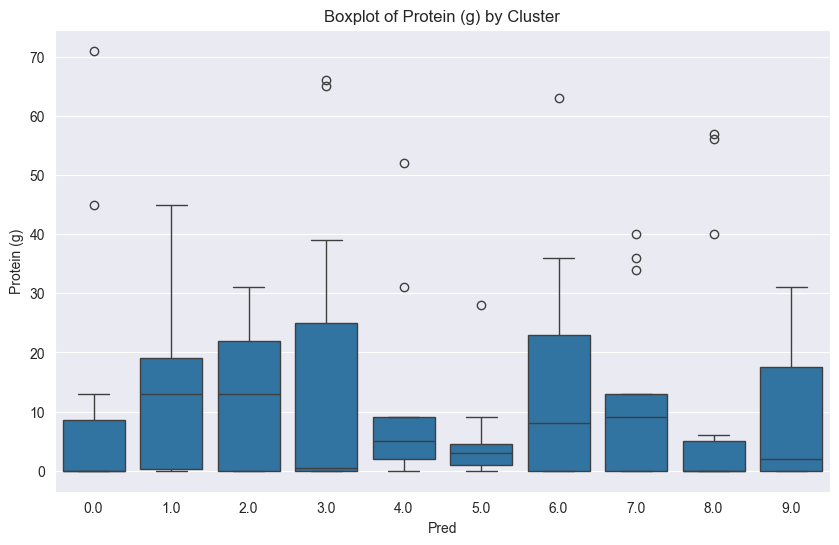

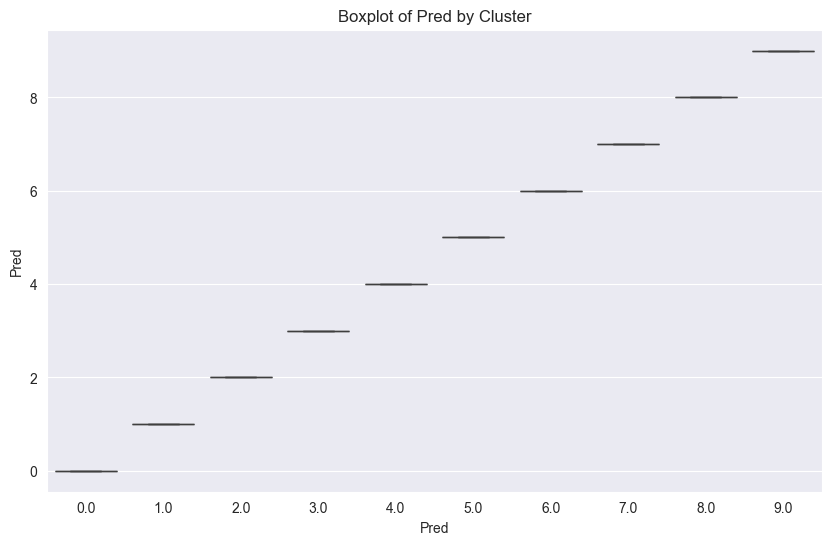

In [9]:
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pred', y=column, data=df_clustered01)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.show()

In [10]:
features = df_clustered01[numeric_columns].drop(columns=['Pred'])
sil_score = silhouette_score(features, df_clustered01['Pred'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: -0.23752427864478698


In [11]:
df_clustered02 = pd.read_csv('all_categories_clustered.csv')
print (df_clustered02.head())

                               Item            Category  Calories  \
0           American Cheese (slice)  Additional Options        40   
1                  Ketchup (Packet)  Additional Options        10   
2               Mayonnaise (Packet)  Additional Options        80   
3  Strawberry or Grape Jam (packet)  Additional Options        25   
4             Breakfast Syrup- 1 oz  Additional Options        90   

   Fat Calories  Fat (g)  Saturated Fat (g)  Trans Fat (g)  Cholesterol (mg)  \
0            30      3.5                2.0            0.0                10   
1             0      0.0                0.0            0.0                 0   
2            80      9.0                0.5            0.0                10   
3             0      0.0                0.0            0.0                 0   
4             0      0.0                0.0            0.0                 0   

   Sodium (mg)  Total Carb (g)  Dietary Fiber (g)  Sugars (g)  Protein (g)  \
0          180            

In [12]:
clusters = df_clustered02.groupby('Pred')

for cluster_id, cluster_data in clusters:
    print(f"Cluster: {cluster_id}:")
    print(cluster_data[['Item', 'Category']])
    print("\n")

Cluster: 0.0:
                                      Item            Category
5             Barbecue Dipping Sauce- 1 oz  Additional Options
15                     Coca Cola- 29 fl oz            Beverage
23                        Sprite- 29 fl oz            Beverage
27                    Dr. Pepper- 29 fl oz            Beverage
35                   Cherry Coke- 29 fl oz            Beverage
39                  Fanta Orange- 29 fl oz            Beverage
43                   Fruit Punch- 29 fl oz            Beverage
47          MINUTE MAID Lemonade- 29 fl oz            Beverage
63   BK Cafe Iced Vanilla Coffee- 12 fl oz             BK Cafe
86             Pancake and Sausage platter           Breakfast
98     Triple WHOPPER Sandwich with Cheese             Burgers
122                  Chicken Nuggets- 20pc      Chicken & More
134                       OREOCookie Shake            Desserts
147                     Onion Rings- small      Salads & Sides
148                    Onion Rings- mediu